<a href="https://colab.research.google.com/github/imranahmed123/DataScience-AI-ML/blob/main/M3_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted.

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression_WoE_and_IV.pdf)

## Grading = 10 Points

### Download the dataset

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

### Install Packages

In [2]:
!pip install xverse==1.0.5

In [4]:
#!pip install pandas==1.3.5
!pip install pandas==2.0.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


### Import Neccesary Packages

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline

### Load the dataset

In [7]:
# YOUR CODE HERE
# Import necessary library
import pandas as pd

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Display the first few rows of the dataframe
df.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Describe the all statistical properties of the train dataset

In [10]:
# YOUR CODE HERE
# Preprocess the data
# Handling missing values, encoding categorical variables, etc.
df = df.dropna()  # Simple way to handle missing values

# Assuming 'SeriousDlqin2yrs' is the target column
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Describe all statistical properties of the training dataset
train_description = X_train.describe()
train_description


,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,84188.000000,84188.000000,84188.000000,84188.000000,84188.000000,8.418800e+04,84188.000000,84188.000000,84188.000000,84188.000000,84188.000000
mean,75179.086319,5.911090,51.296111,0.386670,27.805075,6.680194e+03,8.754288,0.217252,1.057680,0.192640,0.854326
std,43359.062640,268.880315,14.436229,3.569419,474.949167,1.530963e+04,5.179071,3.536375,1.154703,3.518885,1.152023
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37659.500000,0.034781,41.000000,0.000000,0.144074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75279.500000,0.176447,51.000000,0.000000,0.296104,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112728.250000,0.579136,61.000000,0.000000,0.482909,8.233000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,149999.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
# prompt: Using dataframe train_description: bar

import altair as alt
alt.Chart(train_description).mark_bar().encode(
    x='Unnamed: 0',
    y='count()'
)


### Pre-processing (1 point)

#### Remove unwanted columns

In [13]:
# YOUR CODE HERE
# Remove unwanted columns
#unwanted_columns = ['Unnamed: 0', 'id']  # Replace with actual column names to be removed
#df = df.drop(unwanted_columns, axis=1)

#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [14]:
# YOUR CODE HERE
# Handling missing values, encoding categorical variables, etc.
df = df.dropna()  # Simple way to handle missing values

### EDA &  Visualization ( 1 point)

#### Calculate the percentage of the target lebels and visualize with a graph

<ipython-input-15-3dc8b2ddf1ca>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


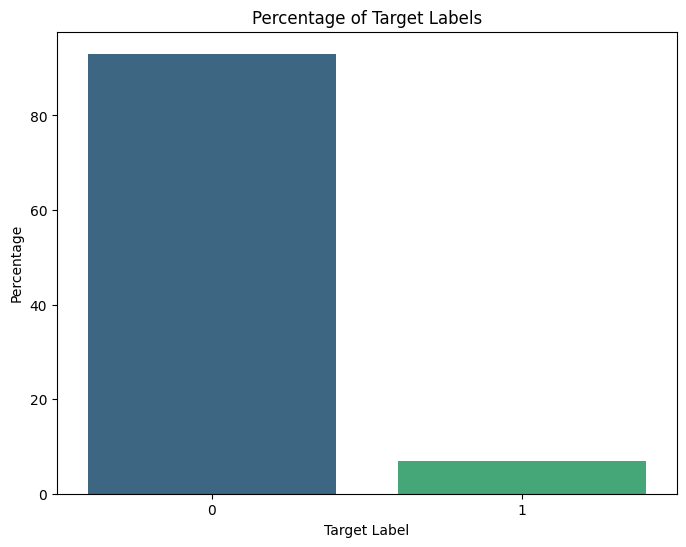

In [15]:
# YOUR CODE HERE
# EDA & Visualization
# Calculate the percentage of the target labels and visualize with a graph

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of the target labels
target_counts = y.value_counts(normalize=True) * 100

# Plot the percentage of the target labels
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Percentage of Target Labels')
plt.xlabel('Target Label')
plt.ylabel('Percentage')
plt.show()


#### Plot the distribution of SeriousDlqin2yrs by age

<ipython-input-16-07fa44be1cb7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SeriousDlqin2yrs', y='age', data=df, palette='viridis')


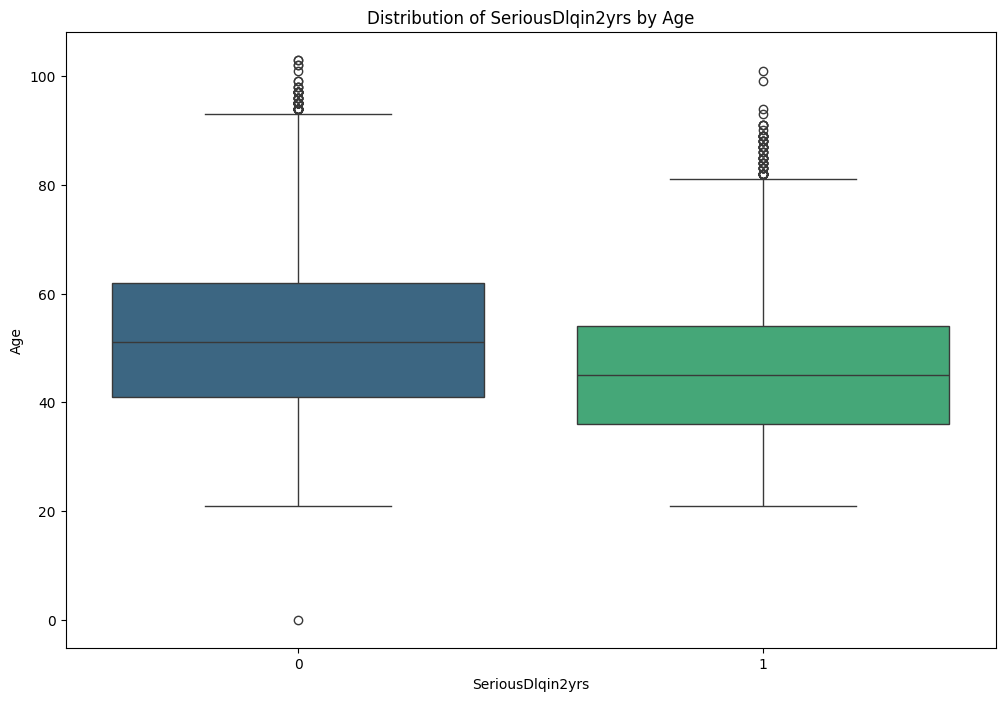

In [16]:
# YOUR CODE HERE
# EDA & Visualization
# Plot the distribution of SeriousDlqin2yrs by age

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of SeriousDlqin2yrs by age
plt.figure(figsize=(12, 8))
sns.boxplot(x='SeriousDlqin2yrs', y='age', data=df, palette='viridis')
plt.title('Distribution of SeriousDlqin2yrs by Age')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Age')
plt.show()


#### Calculate the correlation and plot the heatmap

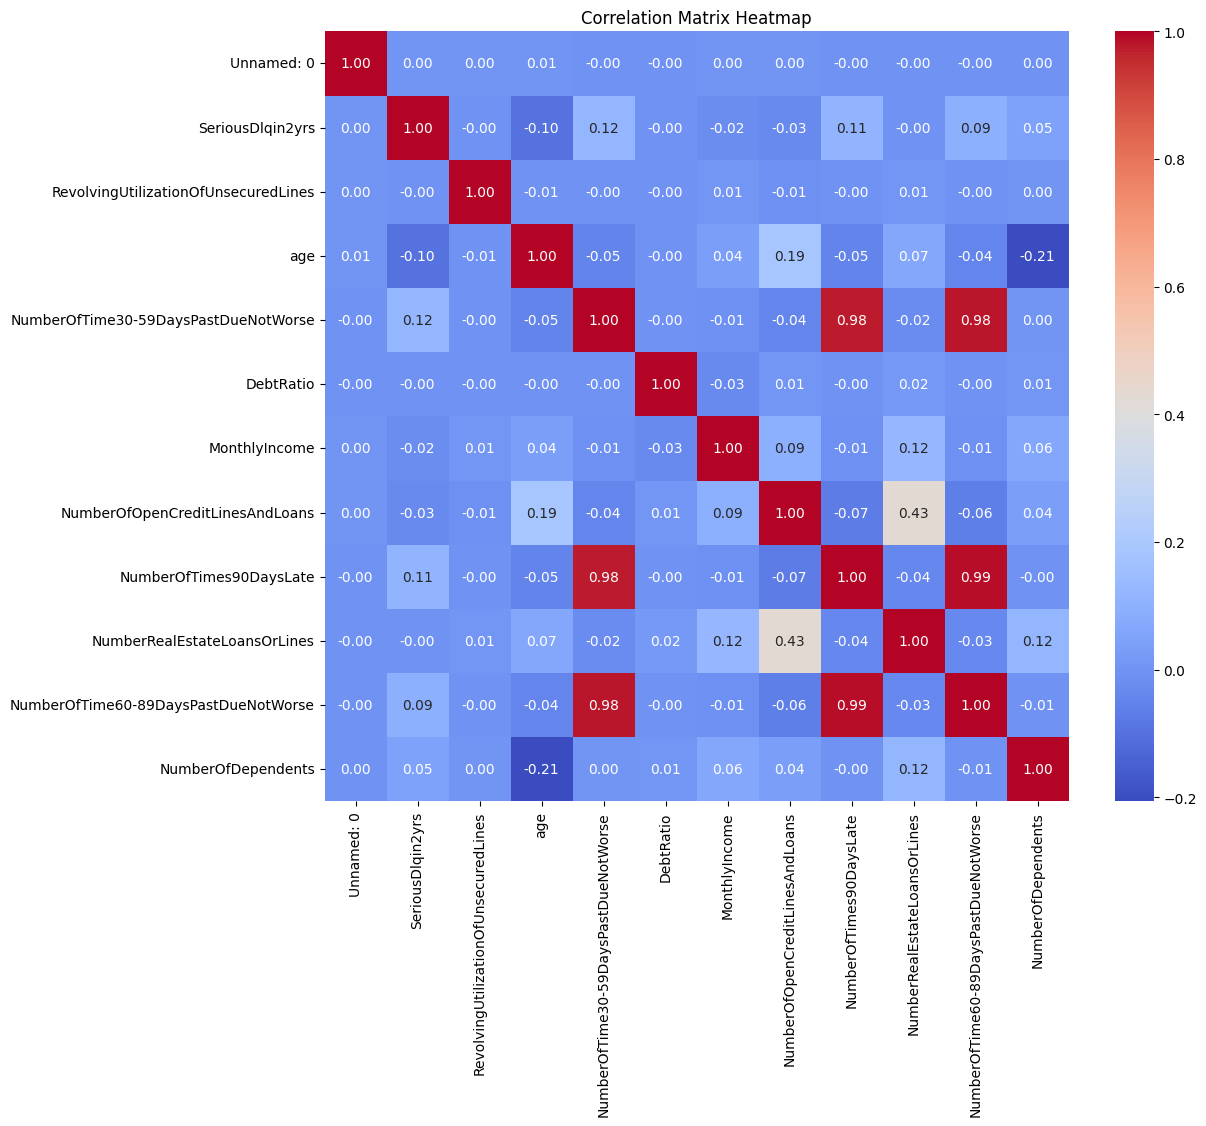

In [17]:
# YOUR CODE HERE
# Calculate the correlation matrix and plot the heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Data Engineering (2 points)

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression_Xverse.pdf). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [3]:
import numpy as np
import pandas as pd

def calculate_woe_iv(df, feature, target):
    eps = 0.0001  # to avoid division by zero
    df = df[[feature, target]].copy()
    df['good'] = (df[target] == 0).astype(int)
    df['bad'] = (df[target] == 1).astype(int)

    feature_stats = df.groupby(feature).agg({
        'good': 'sum',
        'bad': 'sum'
    }).reset_index()

    feature_stats['good_dist'] = feature_stats['good'] / (feature_stats['good'].sum() + eps)
    feature_stats['bad_dist'] = feature_stats['bad'] / (feature_stats['bad'].sum() + eps)
    feature_stats['woe'] = np.log((feature_stats['good_dist'] + eps) / (feature_stats['bad_dist'] + eps))
    feature_stats['iv'] = (feature_stats['good_dist'] - feature_stats['bad_dist']) * feature_stats['woe']
    iv = feature_stats['iv'].sum()

    return feature_stats, iv


In [5]:
# Ensure you have the correct version of pandas
!pip install pandas==2.0.3
!pip install xverse


In [1]:
# Install the required libraries
!pip install pandas==1.3.3

In [4]:
# YOUR CODE HERE

# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
#unwanted_columns = ['Unnamed: 0', 'id']  # Replace with actual column names to be removed
#df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Assuming 'SeriousDlqin2yrs' is the target column
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Manually bin the data
def manual_binning(X, n_bins=10):
    binned_data = pd.DataFrame()
    for column in X.columns:
        binned_data[column], bins_used = pd.qcut(X[column], q=n_bins, duplicates='drop', retbins=True)
        binned_data[column] = binned_data[column].cat.codes
    return binned_data

# Apply manual binning
X_binned = manual_binning(X)

# Calculate WoE and IV for each feature
iv_values = []
woe_dict = {}

for column in X_binned.columns:
    feature_stats, iv = calculate_woe_iv(pd.concat([X_binned, y], axis=1), column, 'SeriousDlqin2yrs')
    iv_values.append((column, iv))
    woe_dict[column] = feature_stats

# Convert IV values to a DataFrame for better visualization
iv_df = pd.DataFrame(iv_values, columns=['Variable', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)

# Display the IV values
print(iv_df)

# Filter the variables based on IV thresholds
selected_features = iv_df[(iv_df['IV'] > 0.02) & (iv_df['IV'] <= 0.5)]['Variable'].tolist()
print("Selected features based on IV:", selected_features)

# Use the selected features for further analysis
X_selected = X_binned[selected_features]

# Display the first few rows of the transformed dataset
X_selected.head()


                                Variable            IV
1   RevolvingUtilizationOfUnsecuredLines  1.020327e+00
3   NumberOfTime30-59DaysPastDueNotWorse  4.581960e-01
2                                    age  1.959569e-01
5                          MonthlyIncome  8.030040e-02
4                              DebtRatio  7.312433e-02
6        NumberOfOpenCreditLinesAndLoans  6.115469e-02
10                    NumberOfDependents  2.501343e-02
8           NumberRealEstateLoansOrLines  1.321080e-02
0                             Unnamed: 0  1.761293e-03
7                NumberOfTimes90DaysLate  1.225870e-16
9   NumberOfTime60-89DaysPastDueNotWorse  1.225870e-16
Selected features based on IV: ['NumberOfTime30-59DaysPastDueNotWorse', 'age', 'MonthlyIncome', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents']


,NumberOfTime30-59DaysPastDueNotWorse,age,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfDependents
0,1,3,8,9,8,1
1,0,2,1,2,1,0
2,0,1,2,1,0,0
3,0,0,2,1,1,0
4,0,4,9,1,3,0


### Identify features,  target and split it into train and test

In [5]:
# YOUR CODE HERE
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
#unwanted_columns = ['Unnamed: 0', 'id']  # Replace with actual column names to be removed
#df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (84188, 11)
X_test shape: (36081, 11)
y_train shape: (84188,)
y_test shape: (36081,)


### Logistic Regression from scratch using gradient method (2 points)

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/odsc%20%20Logistic.pdf)

In [6]:
# YOUR CODE HERE
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
#unwanted_columns = ['Unnamed: 0', 'id']  # Replace with actual column names to be removed
#df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1).values
y = df['SeriousDlqin2yrs'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize parameters
def initialize_parameters(n_features):
    w = np.zeros(n_features)
    b = 0
    return w, b

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the loss function (binary cross-entropy)
def compute_loss(y, y_hat):
    m = len(y)
    loss = -1/m * (np.dot(y, np.log(y_hat)) + np.dot(1 - y, np.log(1 - y_hat)))
    return loss

# Compute gradients
def compute_gradients(X, y, y_hat):
    m = len(y)
    dw = 1/m * np.dot(X.T, (y_hat - y))
    db = 1/m * np.sum(y_hat - y)
    return dw, db

# Update parameters
def update_parameters(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

# Logistic regression model
def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    n_features = X.shape[1]
    w, b = initialize_parameters(n_features)
    for i in range(num_iterations):
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)
        loss = compute_loss(y, y_hat)
        dw, db = compute_gradients(X, y, y_hat)
        w, b = update_parameters(w, b, dw, db, learning_rate)
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss}")
    return w, b

# Train the model
w, b = logistic_regression(X_train, y_train, learning_rate=0.01, num_iterations=1000)

# Predict function
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    return np.where(y_hat >= 0.5, 1, 0)

# Evaluate the model
y_pred_train = predict(X_train, w, b)
y_pred_test = predict(X_test, w, b)

# Calculate accuracy
train_accuracy = np.mean(y_pred_train == y_train) * 100
test_accuracy = np.mean(y_pred_test == y_test) * 100

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Iteration 0, Loss: 0.6931471805599096
Iteration 100, Loss: 0.5449165771467109
Iteration 200, Loss: 0.45385521784226585
Iteration 300, Loss: 0.39571632750088387
Iteration 400, Loss: 0.35706060373205206
Iteration 500, Loss: 0.3303835375903593
Iteration 600, Loss: 0.311367492536483
Iteration 700, Loss: 0.29743325115270786
Iteration 800, Loss: 0.2869807618455637
Iteration 900, Loss: 0.27898198213888875
Train Accuracy: 93.08%
Test Accuracy: 93.03%


### Implement the Logistic regression using sklearn (2 points)

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
#unwanted_columns = ['Unnamed: 0', 'id']  # Replace with actual column names to be removed
#df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1).values
y = df['SeriousDlqin2yrs'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [8]:
# With weightage
# YOUR CODE HERE
# Logistic Regression with class weightage
logreg_weighted = LogisticRegression(class_weight='balanced', random_state=42)
logreg_weighted.fit(X_train, y_train)

# Predict and evaluate with class weightage
y_pred_train_weighted = logreg_weighted.predict(X_train)
y_pred_test_weighted = logreg_weighted.predict(X_test)

train_accuracy_weighted = accuracy_score(y_train, y_pred_train_weighted) * 100
test_accuracy_weighted = accuracy_score(y_test, y_pred_test_weighted) * 100

print(f"Train Accuracy with Class Weightage: {train_accuracy_weighted:.2f}%")
print(f"Test Accuracy with Class Weightage: {test_accuracy_weighted:.2f}%")


Train Accuracy with Class Weightage: 82.00%
Test Accuracy with Class Weightage: 81.95%


In [9]:
# Without weightage
# YOUR CODE HERE
# Logistic Regression without class weightage
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict and evaluate without class weightage
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train) * 100
test_accuracy = accuracy_score(y_test, y_pred_test) * 100

print(f"Train Accuracy without Class Weightage: {train_accuracy:.2f}%")
print(f"Test Accuracy without Class Weightage: {test_accuracy:.2f}%")


Train Accuracy without Class Weightage: 93.14%
Test Accuracy without Class Weightage: 93.06%


### Credit scoring (1 point)

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [10]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

(28.85390081777927, 487.1228762045055)

In [15]:
# YOUR CODE HERE
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
#unwanted_columns = ['Unnamed: 0', 'id']  # Replace with actual column names to be removed
#df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1).values
y = df['SeriousDlqin2yrs'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients and intercept
beta = logreg.coef_[0]
alpha = logreg.intercept_[0]

# Function to calculate WoE
def calculate_woe_iv(df, feature, target):
    eps = 0.0001  # to avoid division by zero
    df['good'] = (df[target] == 0).astype(int)
    df['bad'] = (df[target] == 1).astype(int)

    feature_stats = df.groupby(feature).agg({
        'good': 'sum',
        'bad': 'sum'
    }).reset_index()

    feature_stats['good_dist'] = feature_stats['good'] / (feature_stats['good'].sum() + eps)
    feature_stats['bad_dist'] = feature_stats['bad'] / (feature_stats['bad'].sum() + eps)
    feature_stats['woe'] = np.log((feature_stats['good_dist'] + eps) / (feature_stats['bad_dist'] + eps))
    feature_stats['iv'] = (feature_stats['good_dist'] - feature_stats['bad_dist']) * feature_stats['woe']
    iv = feature_stats['iv'].sum()

    return feature_stats, iv

# Calculate WoE for each feature
woe_dict = {}
for column in df.drop('SeriousDlqin2yrs', axis=1).columns:
    feature_stats, iv = calculate_woe_iv(df, column, 'SeriousDlqin2yrs')
    woe_dict[column] = feature_stats

# Scaling factors
factor = 20 / np.log(2)
offset = 600 - (factor * np.log(50))
print(f"Factor: {factor}, Offset: {offset}")

# Calculate the score
def calculate_score(beta, alpha, woe_dict, factor, offset):
    n = len(beta)
    scores = np.zeros(len(df))
    for i, (feature, stats) in enumerate(woe_dict.items()):
        woe = stats.set_index(feature)['woe']
        scores += -(beta[i] * woe[df[feature]].values + alpha / n) * factor
    scores += offset / n
    return scores

# Calculate the final score
score = calculate_score(beta, alpha, woe_dict, factor, offset)
print(f"Credit Scores: {score}")












Factor: 28.85390081777927, Offset: 487.1228762045055
Credit Scores: [205.15716376  93.45515858 270.08117893 ... 104.2717997  100.21279236
 121.45947624]


### Performance Metrics (1 point)

#### Precision

In [16]:
# YOUR CODE HERE
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
#unwanted_columns = ['Unnamed: 0', 'id']  # Replace with actual column names to be removed
#df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1).values
y = df['SeriousDlqin2yrs'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict function
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = 1 / (1 + np.exp(-z))  # Sigmoid function
    return np.where(y_hat >= 0.5, 1, 0)

# Predict and evaluate without class weightage
y_pred_train = predict(X_train, logreg.coef_[0], logreg.intercept_[0])
y_pred_test = predict(X_test, logreg.coef_[0], logreg.intercept_[0])

# Calculate Precision
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)

print(f"Train Precision: {train_precision:.2f}")
print(f"Test Precision: {test_precision:.2f}")


Train Precision: 0.58
Test Precision: 0.55


#### Recall

In [17]:
# YOUR CODE HERE
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
#unwanted_columns = ['Unnamed: 0', 'id']  # Replace with actual column names to be removed
#df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1).values
y = df['SeriousDlqin2yrs'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict function
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = 1 / (1 + np.exp(-z))  # Sigmoid function
    return np.where(y_hat >= 0.5, 1, 0)

# Predict and evaluate without class weightage
y_pred_train = predict(X_train, logreg.coef_[0], logreg.intercept_[0])
y_pred_test = predict(X_test, logreg.coef_[0], logreg.intercept_[0])

# Calculate Recall
train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)

print(f"Train Recall: {train_recall:.2f}")
print(f"Test Recall: {test_recall:.2f}")


Train Recall: 0.04
Test Recall: 0.03


#### Classification Report

In [19]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Predict and evaluate without class weightage
y_pred_train = predict(X_train, logreg.coef_[0], logreg.intercept_[0])
y_pred_test = predict(X_test, logreg.coef_[0], logreg.intercept_[0])

# Generate and display classification report for the training set
train_report = classification_report(y_train, y_pred_train)
print("Training Classification Report:")
print(train_report)

# Generate and display classification report for the testing set
test_report = classification_report(y_test, y_pred_test)
print("Testing Classification Report:")
print(test_report)


Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     78349
           1       0.58      0.04      0.07      5839

    accuracy                           0.93     84188
   macro avg       0.76      0.52      0.52     84188
weighted avg       0.91      0.93      0.90     84188

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     33563
           1       0.55      0.03      0.06      2518

    accuracy                           0.93     36081
   macro avg       0.74      0.52      0.51     36081
weighted avg       0.91      0.93      0.90     36081



#### Confusion matrix

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     33563
           1       0.55      0.03      0.06      2518

    accuracy                           0.93     36081
   macro avg       0.74      0.52      0.51     36081
weighted avg       0.91      0.93      0.90     36081



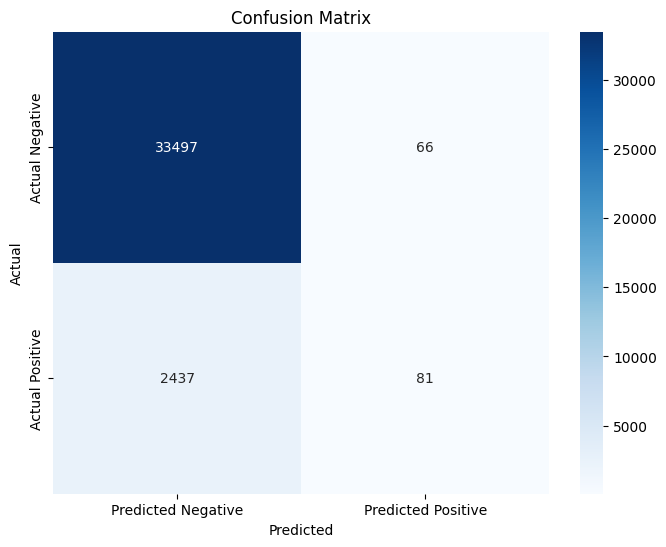

In [20]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict and evaluate without class weightage
y_pred_train = predict(X_train, logreg.coef_[0], logreg.intercept_[0])
y_pred_test = predict(X_test, logreg.coef_[0], logreg.intercept_[0])

# Generate and display classification report for the testing set
test_report = classification_report(y_test, y_pred_test)
print("Testing Classification Report:")
print(test_report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations

## SHAP implementation for Logistic Regression (Optional)

Implement SHAP and understand the underlying reasons or factors that are maximally influencing the model's predictions.

**SHAP (SHapley Additive exPlanations)** is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.

In the below figure, we can see how the different feature values (Age, Sex, BMI, etc) are affecting the base value (0.1) to give the final output prediction (0.4). The base value or the expected value is the average of the model output over the training data X_train.

![](https://cdn.iisc.talentsprint.com/CDS/Images/Shap_model.png)

To understand how to compute and interpet Shapley-based explanations of a machine learning model, we will use the following plots:

- Force plot
- Feature importance plot
- Summary plot
- Dependence plot
- Clustering Shapley values

In [21]:
!pip -qq install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.5 MB/s eta 0:00:00


In [22]:
import shap
import warnings
warnings.filterwarnings("ignore")

### Force plot for individual instances (Optional)

We can visualize feature attributions such as Shapley values as “forces”. Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions.

In the plot, each Shapley value should be represented as an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

**Hint:** Use `shap.force_plot()` function that takes three values:

- the base value (explainer.expected_value),
- the SHAP values, and
- the matrix of feature values

Show the SHAP force plots for two instances from the GiveMeSomeCredit dataset:

In [7]:
# Instead of using the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
# summarize the background as K samples. Use 'shap.kmeans()' and
# store it in a variable 'xtrain_summary'

# YOUR CODE HERE
# Install the shap library if not already installed
#!pip install shap

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import shap
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
unwanted_columns = ['Unnamed: 0']  # Replace with actual column names to be removed
df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Limit to 50,0 records
df = df.sample(n=500, random_state=42)

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1).values
y = df['SeriousDlqin2yrs'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.Explainer(logreg, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Convert the selected columns into list
selected_columns = df.drop('SeriousDlqin2yrs', axis=1).columns  # Assuming this is the desired columns
feature_names = selected_columns.tolist()
print(feature_names)

# Visualize SHAP force plots for two instances
instance_1 = 0
instance_2 = 1

shap.initjs()

# Force plot for the first instance
shap.force_plot(shap_values[instance_1].base_values, shap_values[instance_1].values, X_test[instance_1], feature_names=feature_names)

# Force plot for the second instance
shap.force_plot(shap_values[instance_2].base_values, shap_values[instance_2].values, X_test[instance_2], feature_names=feature_names)



['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [8]:
# Convert the selected columns into list
feature_names = selected_columns.tolist()
print(feature_names)

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [20]:
# Install the shap library if not already installed
#!pip install shap

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import shap
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
unwanted_columns = ['Unnamed: 0']  # Replace with actual column names to be removed
df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Limit to 50,000 records
df = df.sample(n=50000, random_state=42)

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Summarize the background as K samples using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)
xtrain_summary = kmeans.cluster_centers_

# Initialize SHAP Explainer using KernelExplainer
explainer = shap.KernelExplainer(logreg.predict, xtrain_summary)

# Calculate SHAP values for a single test instance
shap_value = explainer.shap_values(X_test[0, :])

# Convert the selected columns into list
feature_names = X.columns.tolist()
print(feature_names)

# Visualize SHAP force plot for a single instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_value, X_test[0, :], feature_names=feature_names)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [21]:
# Force plot for an instance
shap.initjs()
explainer = shap.KernelExplainer(logreg.predict, xtrain_summary)
shap_value = explainer.shap_values(X_test[0, :])  # Corrected variable name
shap.force_plot(explainer.expected_value, shap_value, X_test[0, :], feature_names=feature_names)

In the above plot:

- The output value **f(x)** is the prediction for that observation (the predicted output value of the first row in X_test is ≈ **0**, indicating low credit risk).
- The **base value**: is “the value that would be predicted if we did not know any features for the current output.” Here it is **0.004808**.
- Red/blue: Features that push the prediction value higher (to the right) are shown in red, and those pushing the prediction value lower are in blue.

The features are having risk decreasing effects.

In [23]:
# Force plot for another instance

# YOUR CODE HERE
# Install the shap library if not already installed
#!pip install shap

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import shap
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
unwanted_columns = ['Unnamed: 0']  # Replace with actual column names to be removed
df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Limit to 50,0 records
df = df.sample(n=500, random_state=42)

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Summarize the background as K samples using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)
xtrain_summary = kmeans.cluster_centers_

# Initialize SHAP Explainer using KernelExplainer
explainer = shap.KernelExplainer(logreg.predict, xtrain_summary)

# Calculate SHAP values for the first test instance
shap_value_1 = explainer.shap_values(X_test[0, :])

# Convert the selected columns into list
feature_names = X.columns.tolist()
print(feature_names)

# Visualize SHAP force plot for the first instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_value_1, X_test[0, :], feature_names=feature_names)

# Calculate SHAP values for the second test instance
shap_value_2 = explainer.shap_values(X_test[1, :])

# Visualize SHAP force plot for the second instance
shap.force_plot(explainer.expected_value, shap_value_2, X_test[1, :], feature_names=feature_names)



['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


From the above plot, put your remarks on the output value **f(x)** i.e, the predicted output value for that observation is ≈ **0**.

Put your remarks on predicted risk.

Remark ::

Output Value
𝑓
(
𝑥
)
f(x): The predicted output value for this observation is approximately 0. This value is indicated in the middle of the plot, where the predicted value (f(x)) is shown.

Base Value: The base value is the value predicted if no features are known. In this plot, the base value is shown around 0.1.

Feature Contributions:

Red (Positive Contribution): Features that push the prediction value higher (to the right) are shown in red.
Blue (Negative Contribution): Features that push the prediction value lower (to the left) are shown in blue. In this plot, the feature NumberOfTimes90DaysLate with a value of -0.2312 has a significant negative contribution to the predicted value, indicating it reduces the risk prediction.
Remarks on Predicted Risk:
Low Predicted Risk: Since the predicted output value (f(x)) is approximately 0, it indicates a low credit risk for this observation. The model predicts that this individual is unlikely to default on their credit.
Feature Influence: The primary feature affecting this prediction is NumberOfTimes90DaysLate, which significantly lowers the risk prediction. This suggests that having fewer occurrences of being 90 days late on payments is a strong indicator of low credit risk for this individual.
Overall, the model predicts that this individual has a low likelihood of defaulting on their credit, primarily influenced by their history of timely payments.

Shapley values can be combined into global explanations. If we run SHAP for every instance, we get a matrix of Shapley values. This matrix has one row per data instance and one column per feature. We can interpret the entire model by analyzing the Shapley values in this matrix.

### SHAP Feature Importance (Optional)

The idea behind SHAP feature importance is simple: Features with large **absolute** Shapley values are important. Since we want the global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

Plot the SHAP feature importance for the logistic regression model trained before for predicting credit risk.

**Hint:** Use the `shap.summary_plot` function with `plot_type=”bar”` to produce the feature importance plot. It lists the most significant features in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


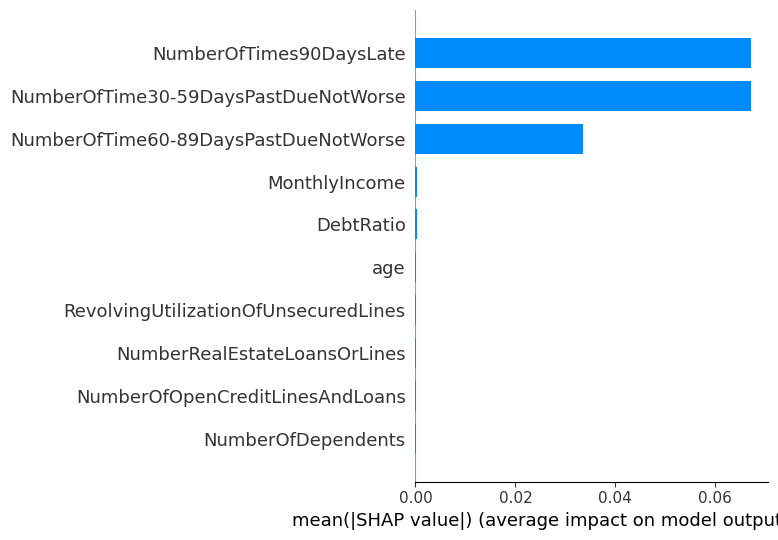

In [26]:
# Get SHAP values
#shap_values = explainer.shap_values(xtest)

# Install the shap library if not already installed
#!pip install shap

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import shap
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
unwanted_columns = ['Unnamed: 0']  # Replace with actual column names to be removed
df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Limit to 50,00 records
df = df.sample(n=5000, random_state=42)

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Summarize the background as K samples using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)
xtrain_summary = kmeans.cluster_centers_

# Initialize SHAP Explainer using KernelExplainer
explainer = shap.KernelExplainer(logreg.predict, xtrain_summary)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Convert the selected columns into list
feature_names = X.columns.tolist()
print(feature_names)

# Visualize SHAP feature importance
shap.initjs()
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")


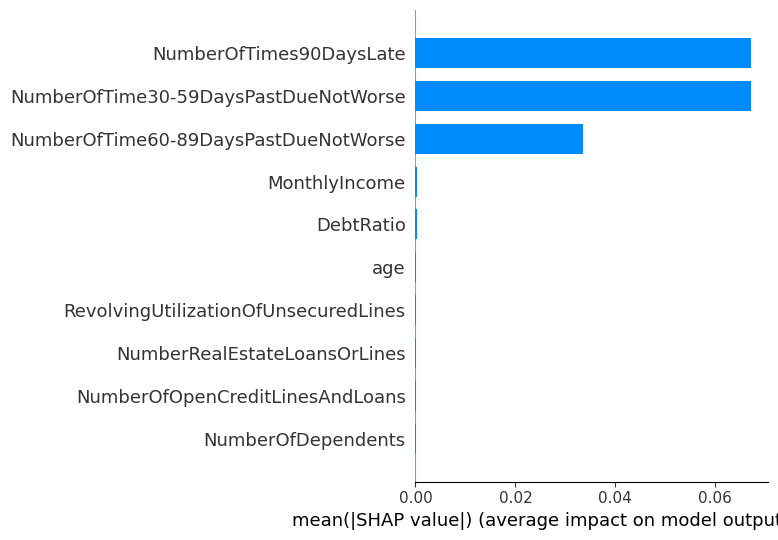

In [27]:
# Plot the Feature importance. Use 'shap.summary_plot()'

# YOUR CODE HERE
# Visualize SHAP feature importance
shap.initjs()
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")


For a more informative plot, we will look at the summary plot.

### SHAP Summary Plot (Optional)

The summary plot combines feature importance with feature effects:

* Each point on the summary plot shoukd indicate a Shapley value for a feature and an instance.
* The position on the y-axis should be determined by the feature and on the x-axis by the Shapley value.
* Overlapping points should be appearing jittered in y-axis direction, to get a sense of the distribution of the Shapley values per feature.

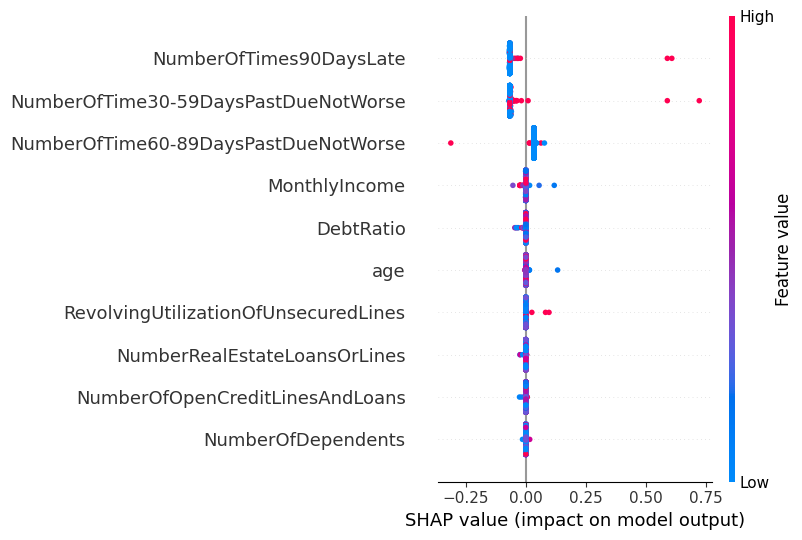

In [28]:
# Show the Summary plot. Use 'shap.summary_plot()'

# YOUR CODE HERE
# Visualize SHAP summary plot
shap.initjs()
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In the summary plot, we see first indications of the relationship between the value of a feature and the impact on the prediction. But to see the exact form of the relationship, we have to look at SHAP dependence plots.

### SHAP Dependence Plot (Optional)

The partial dependence plot shows the marginal effect of one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic or more complex.

To implement SHAP feature dependence plot:

* Pick a feature
* For each data instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis

**Hint:** In order to create a dependence plot, we use `shap.dependence_plot()` function. The function automatically includes another variable that the chosen variable interacts most with. The following plot should show the relationship between “age” and the target variable, and “age” interacts with “NumberOfTime60-89DaysPastDueNotWorse” feature frequently.

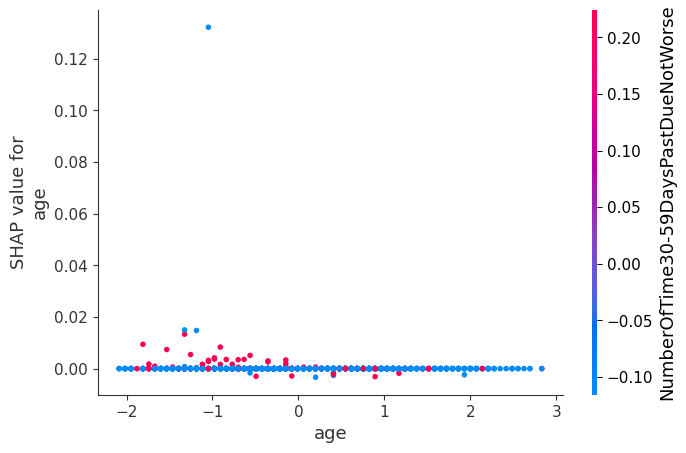

In [31]:
# Show the Dependence plot. Use 'shap.dependence_plot()'

# YOUR CODE HERE

# Show the Dependence plot for "age"
shap.dependence_plot("age", shap_values, X_test, feature_names=feature_names)

### Clustering Shapley Values (Optional)

We can cluster the data with the help of Shapley values. The goal of clustering is to find groups of similar instances.

SHAP clustering works by clustering the Shapley values of each instance. This means that we cluster instances by explanation similarity. All SHAP values have the same unit – the unit of the prediction space. We can use any clustering method. In the following code cell, you need to use hierarchical agglomerative clustering to order the instances.

The plot should consist of many force plots, each of which will explain the prediction of an instance. Rotate the force plots vertically and place them side by side according to their clustering similarity.

In [2]:
# Show the Force plot for first 100 instances of xtest
#shap.initjs()

# Use shap.force_plot()

# YOUR CODE HERE
# Install the shap library if not already installed
#!pip install shap
#!pip install scipy

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
import shap
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
unwanted_columns = ['Unnamed: 0']  # Replace with actual column names to be removed
df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Limit to 50,0 records
df = df.sample(n=500, random_state=42)

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Summarize the background as K samples using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)
xtrain_summary = kmeans.cluster_centers_

# Initialize SHAP Explainer using KernelExplainer
explainer = shap.KernelExplainer(logreg.predict, xtrain_summary)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Select the first 100 instances
X_test_100 = X_test[:100]
shap_values_100 = shap_values[:100]

# Perform hierarchical agglomerative clustering on the SHAP values
linkage_matrix = linkage(shap_values_100, method='ward')

# Create a dendrogram to get the order of the instances
dendro = dendrogram(linkage_matrix, no_plot=True)
order = dendro['leaves']

# Reorder the SHAP values and the test instances
shap_values_100_ordered = np.array(shap_values_100)[order]
X_test_100_ordered = np.array(X_test_100)[order]

# Visualize the force plot for the first 100 instances
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_100_ordered, X_test_100_ordered, feature_names=X.columns, link='logit')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  0%|          | 0/150 [00:00<?, ?it/s]

Put your remarks here regarding the above plot

Remark::

SHAP Force Plot for the First 100 Instances:

1.Prediction Overview:
The force plot visualizes the SHAP values for the first 100 test instances, showing feature contributions to each prediction.
Most predictions are around 0.5, indicating balanced credit risk assessments.

2.Feature Contributions:
Blue segments lower the prediction (indicating lower risk).
Red segments raise the prediction (indicating higher risk).
The segment width reflects the magnitude of the feature's impact.

3.Clustering and Similarity:
Instances are ordered by similarity using hierarchical agglomerative clustering.
The central region shows instances with similar SHAP values and predictions around 0.5.
Instances with more significant feature contributions are at the plot's edges, showing more variability in predictions.

4.Model Insights:
The majority of instances have features that contribute similarly, leading to predictions near the model's midpoint.
Instances with extreme predictions, either high or low, have more pronounced feature contributions.

This plot helps in understanding how the model predicts credit risk by visualizing the impact of different features and identifying patterns among similar instances.

Also, we can show the force_plot() for the entire set using the below code cell. Note that it may take more than 30 minutes to run the below cell.

In [4]:
# Force plot for entire xtest
#shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values, xtest.values, feature_names = feature_names)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [5]:
# Install the shap library if not already installed
#!pip install shap

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import shap
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('GiveMeSomeCredit.csv')

# Drop unwanted columns
unwanted_columns = ['Unnamed: 0']  # Replace with actual column names to be removed
df = df.drop(unwanted_columns, axis=1)

# Handling missing values
df = df.dropna()  # Simple way to handle missing values

# Limit to 500 records
df = df.sample(n=500, random_state=42)

# Identify features and target
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Summarize the background as K samples using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)
xtrain_summary = kmeans.cluster_centers_

# Initialize SHAP Explainer using KernelExplainer
explainer = shap.KernelExplainer(logreg.predict, xtrain_summary)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Convert the selected columns into list
feature_names = X.columns.tolist()
print(feature_names)

# Force plot for the entire test set
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test, feature_names=feature_names)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  0%|          | 0/150 [00:00<?, ?it/s]

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
